In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json

# Load the dictionary
with open('/content/drive/My Drive/Colab Notebooks/MARG/irealPro/vector_representations.json', 'r') as file:
    vector_representations = json.load(file)

print(vector_representations)

chord_sequences = vector_representations


Output hidden; open in https://colab.research.google.com to view.

In [4]:
from itertools import product

def get_lexicographically_smallest_rotation(queue):
    """Get the lexicographically smallest rotation of the queue."""
    n = len(queue)
    rotations = [queue[i:] + queue[:i] for i in range(n)]
    return min(rotations)

def generate_unique_cyclic_representations(length, elements):
    """Generate all unique cyclic representations for a given length and set of elements."""
    seen_representations = set()
    tokens = {}

    for queue in product(elements, repeat=length):
        # Find the lexicographically smallest rotation
        smallest_rotation = get_lexicographically_smallest_rotation(queue)

        # Convert to a string for easy comparison and storage
        rotation_str = ''.join(smallest_rotation)

        # Check if this representation has already been seen
        if rotation_str not in seen_representations:
            seen_representations.add(rotation_str)
            # Assign a unique token (here, we're using the representation itself as the token)
            tokens[rotation_str] = len(seen_representations)

    return tokens

# This will generate all unique cyclic representations for a 12-element queue
#unique_cyclic_representations = generate_unique_cyclic_representations(12, ['A', 'B', 'C', 'D'])
# Due to the computational limitations, the above line is commented out


In [ ]:
print(unique_cyclic_representations)

{'AAAA': 1, 'AAAB': 2, 'AAAC': 3, 'AAAD': 4, 'AABB': 5, 'AABC': 6, 'AABD': 7, 'AACB': 8, 'AACC': 9, 'AACD': 10, 'AADB': 11, 'AADC': 12, 'AADD': 13, 'ABAB': 14, 'ABAC': 15, 'ABAD': 16, 'ABBB': 17, 'ABBC': 18, 'ABBD': 19, 'ABCB': 20, 'ABCC': 21, 'ABCD': 22, 'ABDB': 23, 'ABDC': 24, 'ABDD': 25, 'ACAC': 26, 'ACAD': 27, 'ACBB': 28, 'ACBC': 29, 'ACBD': 30, 'ACCB': 31, 'ACCC': 32, 'ACCD': 33, 'ACDB': 34, 'ACDC': 35, 'ACDD': 36, 'ADAD': 37, 'ADBB': 38, 'ADBC': 39, 'ADBD': 40, 'ADCB': 41, 'ADCC': 42, 'ADCD': 43, 'ADDB': 44, 'ADDC': 45, 'ADDD': 46, 'BBBB': 47, 'BBBC': 48, 'BBBD': 49, 'BBCC': 50, 'BBCD': 51, 'BBDC': 52, 'BBDD': 53, 'BCBC': 54, 'BCBD': 55, 'BCCC': 56, 'BCCD': 57, 'BCDC': 58, 'BCDD': 59, 'BDBD': 60, 'BDCC': 61, 'BDCD': 62, 'BDDC': 63, 'BDDD': 64, 'CCCC': 65, 'CCCD': 66, 'CCDD': 67, 'CDCD': 68, 'CDDD': 69, 'DDDD': 70}


In [ ]:
print(len(unique_cyclic_representations))

208


In [ ]:
from math import gcd

def generalized_unique_cyclic_sequences(n, k):
    """Generalized function to calculate the number of unique cyclic sequences."""
    total_fixed_points = sum(k ** gcd(n, i) for i in range(n))
    return total_fixed_points // n

# Example usage: Calculate for a queue of length 5 with 4 choices ('A', 'B', 'C', 'D')
unique_sequences_example = generalized_unique_cyclic_sequences(12, 4)
unique_sequences_example



1398500

In [ ]:
from itertools import product

def get_lexicographically_smallest_rotation(queue):
    """Get the lexicographically smallest rotation of the queue."""
    n = len(queue)
    rotations = [queue[i:] + queue[:i] for i in range(n)]
    return min(rotations)

def is_valid_sequence(queue, max_sum=7):
    """Check if the sequence meets the constraints 0 < B + D < 8 and 0 < C + D < 8."""
    b_plus_d = queue.count('B') + queue.count('D')
    c_plus_d = queue.count('C') + queue.count('D')
    return 0 < b_plus_d < max_sum and 0 < c_plus_d < max_sum

def generate_sequences_with_constraints(length, elements, max_sum):
    """Generate sequences with given constraints."""
    for queue in product(elements, repeat=length):
        if is_valid_sequence(queue, max_sum):
            yield queue

def generate_unique_cyclic_representations_with_constraints(length, elements, max_sum):
    """Generate all unique cyclic representations with constraints."""
    seen_representations = set()
    tokens = {}

    for queue in generate_sequences_with_constraints(length, elements, max_sum):
        smallest_rotation = get_lexicographically_smallest_rotation(queue)
        rotation_str = ''.join(smallest_rotation)

        if rotation_str not in seen_representations:
            seen_representations.add(rotation_str)
            tokens[rotation_str] = len(seen_representations)

    return tokens

# Example usage with a smaller length (e.g., 4) to demonstrate the concept
# For larger lengths, this will be very computationally intensive
unique_representations_with_constraints = generate_unique_cyclic_representations_with_constraints(12, ['A', 'B', 'C', 'D'], 8)
len(unique_representations_with_constraints), list(unique_representations_with_constraints.items())[:5]



In [5]:
note_to_index = {
    'C': 0, 'B#': 0, 'C#': 1, 'Db': 1, 'D': 2, 'D#': 3, 'Eb': 3,
    'E': 4, 'Fb': 4, 'E#': 5, 'F': 5, 'F#': 6, 'Gb': 6, 'G': 7,
    'G#': 8, 'Ab': 8, 'A': 9, 'A#': 10, 'Bb': 10, 'B': 11, 'Cb': 11
}

"""Adds an interval to the vector based on the root note."""
interval_semitones = {
    'b2': 1, '2': 2, '#2': 3, 'b3': 3, '3': 4,
    '4': 5, '#4': 6, 'b5': 6, '5': 7, '#5': 8, 'b6': 8,
    '6': 9, 'bb7': 9, 'b7': 10, '7': 11,
    'b9': 13 - 12, '9': 14 - 12, '#9': 15 - 12, '11': 17 - 12, '#11': 18 - 12, 'b13': 20 - 12, '13': 21 - 12,
    'b5/#5': 8, 'b9/#9': 1
}

tension_intervals_reduced = {
    '' : ['3', '5'],
    #'9b5': ['3', 'b5', 'b7', '9'],
    '7#11': ['3', '5', 'b7', '#11'],
    #'-b6': ['b3', '5', 'b6'],
    '-7': ['b3', '5', 'b7'],
    #'7b9#9': ['3', '5', 'b7', 'b9', '#9'],
    #'13sus': ['4', '5', 'b7', '9', '11', '13'],
    #'7b9b5': ['3', 'b5', 'b7', 'b9'],
    '13#9': ['3', '5', 'b7', '#9', '13'],
    '69': ['3', '5', '6', '9'],
    '^9#11': ['3', '5', '7', '9', '#11'],
    '7b9sus': ['4', '5', 'b7', 'b9'],
    '7b9': ['3', '5', 'b7', 'b9'],
    '7#9b5': ['3', 'b5', 'b7', '#9'],
    '13': ['3', '5', 'b7', '9', '11', '13'],
    '7#9#5': ['3', '#5', 'b7', '#9'],
    #'-7b5': ['b3', 'b5', 'b7'],
    '^7#5': ['3', '#5', '7'],
    #'h': ['b3', 'b5', 'b7'],
    '7#9#11': ['3', '5', 'b7', '#9', '#11'],
    '7b9#11': ['3', '5', 'b7', 'b9', '#11'],
    '^7': ['3', '5', '7'],
    '7sus': ['4', '5', 'b7'],
    'o7': ['b3', 'b5', 'bb7'],
    '-9': ['b3', '5', 'b7', '9'],
    '7b5': ['3', 'b5', 'b7'],
    '13b9': ['3', '5', 'b7', 'b9', '13'],
    'add9': ['3', '5', '9'],
    '13#11': ['3', '5', 'b7', '9', '#11', '13'],
    '7#9': ['3', '5', 'b7', '#9'],
    '^9': ['3', '5', '7', '9'],
    'sus': ['4', '5'],
    #'-6': ['b3', '5', '6'],
    #'7b13sus': ['4', '5', 'b7', 'b13'],
    '-': ['b3', '5'],
    '7b9#5': ['3', '#5', 'b7', 'b9'],
    '7b9b13': ['3', '5', 'b7', 'b9', 'b13'],
    'h7': ['b3', 'b5', 'b7'],
    'o^7': ['b3', 'b5', '7'],
    '7#5': ['3', '#5', 'b7'],
    #'7alt': ['3', 'b5/#5', 'b7', 'b9/#9'],
    '+': ['3', '#5'],
    '9#11': ['3', '5', 'b7', '9', '#11'],
    #'^13': ['3', '5', '7', '9', '11', '13'],
    #'9sus': ['4', '5', 'b7', '9'],
    '9': ['3', '5', 'b7', '9'],
    '-11': ['b3', '5', 'b7', '9', '11'],
    '7susadd3': ['3', '4', '5', 'b7'],
    #'^': ['3', '5', '7'],
    #'2': ['2', '5'],
    '9#5': ['3', '#5', 'b7', '9'],
    #'-#5': ['b3', '#5'],
    #'6': ['3', '5', '6'],
    '-69': ['b3', '5', '6', '9'],
    '-^7': ['b3', '5', '7'],
    '7': ['3', '5', 'b7'],
    '^7#11': ['3', '5', '7', '#11'],
    '7b13': ['3', '5', 'b7', 'b13'],
    'o': ['b3', 'b5'],
    #'h9': ['b3', 'b5', 'b7', '9'],

    '-/3': ['b3', '5', '3'],       # '-/' chord with bass note a major 3rd above the root
    '/4': ['3', '5', '4'],         # '/' chord with bass note a perfect 4th above the root
    '7b9/4': ['3', '5', 'b7', 'b9', '4'],  # '7b9' with bass note a perfect 4th above the root
    'o7/b7': ['b3', 'b5', 'bb7', 'b7'],    # 'o7' with bass note a minor 7th above the root
    'o7/b2': ['b3', 'b5', 'bb7', 'b2'],    # 'o7' with bass note a minor 2nd above the root
    'h7/b2': ['b3', 'b5', 'b7', 'b2'],     # 'h7' with bass note a minor 2nd above the root
    '^7/b6': ['3', '5', '7', 'b6'],        # '^7' with bass note a minor 6th above the root
    'o/3': ['b3', 'b5', '3'],              # 'o' with bass note a major 3rd above the root
    '^7#5/5': ['3', '#5', '7', '5'],       # '^7#5' with bass note a perfect 5th above the root
    '-7/b2': ['b3', '5', 'b7', 'b2'],      # '-7' with bass note a minor 2nd above the root
    'o7/5': ['b3', 'b5', 'bb7', '5'],      # 'o7' with bass note a perfect 5th above the root
    '-6/b7': ['b3', '5', '6', 'b7'],       # '-6' with bass note a minor 7th above the root
    '/b3': ['3', '5', 'b3'],               # '/' with bass note a minor 3rd above the root
    'o7/3': ['b3', 'b5', 'bb7', '3'],      # 'o7' with bass note a major 3rd above the root
    '13b9/4': ['3', '5', 'b7', 'b9', '13', '4'],  # '13b9' with bass note a perfect 4th above the root
    '-/2': ['b3', '5', '2'],               # '-/' with bass note a major 2nd above the root
    '/b5': ['3', '5', 'b5'],               # '/' with bass note a diminished 5th above the root
    '-/4': ['b3', '5', '4'],               # '-/' with bass note a perfect 4th above the root
    '-^7/2': ['b3', '5', '7', '2'],        # '-^7' with bass note a major 2nd above the root
    '7#9/2': ['3', '5', 'b7', '#9', '2'],  # '7#9' with bass note a major 2nd above the root
}

In [7]:
def note_to_vector(note):
    """Converts a note to its 12-dimensional vector representation."""
    vector = [0] * 12
    vector[note_to_index[note]] = 1
    return vector

def add_interval_to_vector(vector, root, interval):
    if interval in interval_semitones:
        note_index = (note_to_index[root] + interval_semitones[interval]) % 12
        vector[note_index] = 1
    return vector

def chord_to_vector(chord):
    """Converts a chord string to its 12-dimensional vector representation."""

    if chord is None:
        return [0] * 12  # Return a vector of zeros if the chord is None

    parts = chord.split('/')
    main_part = parts[0]

    # Extract root and tension
    root = main_part[0]
    if len(main_part) > 1 and main_part[1] in ['#', 'b']:
        root += main_part[1]
        tension = main_part[2:]
    else:
        tension = main_part[1:]

    # Start with the root note
    vector = note_to_vector(root)

    intervals = tension_intervals.get(tension, [])

    for interval in intervals:
        vector = add_interval_to_vector(vector, root, interval)

    # Add bass note if it's a fraction chord
    if len(parts) > 1:
        bass = parts[1]
        if bass in note_to_index:  # If bass is a note
            vector = add_interval_to_vector(vector, root, bass)
        else:  # If bass is an interval
            vector = add_interval_to_vector(vector, root, bass)

    return vector

In [8]:
from itertools import product

# Define the roots and tensions
first_root = 'C'
other_roots = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
tensions = list(tension_intervals_reduced.keys())

# Generate all permutations of two chords with different tensions for each root
all_chord_pairs = list(product([first_root], tensions, other_roots, tensions))

# Function to map vector to categories 'A', 'B', 'C', 'D'
def map_vectors_to_categories(vector1, vector2):
    return ['A' if v1 == 0 and v2 == 0 else
            'B' if v1 == 1 and v2 == 0 else
            'C' if v1 == 0 and v2 == 1 else
            'D' for v1, v2 in zip(vector1, vector2)]

# Process each chord pair
mapped_results = []
for first_root, tension1, root2, tension2 in all_chord_pairs:
    first_chord = first_root + tension1
    next_chord = root2 + tension2
    vector1 = chord_to_vector(first_chord)
    vector2 = chord_to_vector(next_chord)
    categories = map_vectors_to_categories(vector1, vector2)
    mapped_results.append((first_chord, next_chord, categories))

# Print some examples from the results
print("First few mapped results:")
for example in mapped_results[:5]:
    print(example)

print(len(tension_intervals))

First few mapped results:
('C', 'C', ['D', 'A', 'A', 'A', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'A'])
('C', 'C7#11', ['D', 'A', 'A', 'A', 'D', 'A', 'C', 'D', 'A', 'A', 'C', 'A'])
('C', 'C-7', ['D', 'A', 'A', 'C', 'B', 'A', 'A', 'D', 'A', 'A', 'C', 'A'])
('C', 'C13#9', ['D', 'A', 'A', 'C', 'D', 'A', 'A', 'D', 'A', 'C', 'C', 'A'])
('C', 'C69', ['D', 'A', 'C', 'A', 'D', 'A', 'A', 'D', 'A', 'C', 'A', 'A'])
63


In [9]:
def generate_unique_cyclic_representations(mapped_results):
    """Generate all unique cyclic representations for given mapped results."""
    seen_representations = set()
    tokens = {}

    for _, _, categories in mapped_results:
        smallest_rotation = get_lexicographically_smallest_rotation(categories)
        rotation_str = ''.join(smallest_rotation)

        if rotation_str not in seen_representations:
            seen_representations.add(rotation_str)
            tokens[rotation_str] = len(seen_representations)

    return tokens

# Generate unique cyclic representations
unique_cyclic_representations = generate_unique_cyclic_representations(mapped_results)

# Print number of unique cyclic representations
print("Number of unique cyclic representations:", len(unique_cyclic_representations))

Number of unique cyclic representations: 35775


In [10]:
def group_by_cyclic_representation(mapped_results):
    """Group mapped results by their unique cyclic representations."""
    groups = {}

    for first_chord, second_chord, categories in mapped_results:
        smallest_rotation = get_lexicographically_smallest_rotation(categories)
        rotation_str = ''.join(smallest_rotation)

        if rotation_str not in groups:
            groups[rotation_str] = []

        groups[rotation_str].append((first_chord, second_chord, categories))

    return groups

# Example data (assuming mapped_results is already populated)
# ...

# Group the results by their cyclic representations
grouped_results = group_by_cyclic_representation(mapped_results)

# Display only the groups with more than one chord change
for representation, group in grouped_results.items():
    if len(group) > 1:  # Check if the group has more than one chord change
        print(f"Representation: {representation}")
        for first_chord, second_chord, categories in group:
            print(f"  Chords: {first_chord}, {second_chord}, Categories: {categories}")
        print()


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  Chords: C^7#5/5, A#o7/b7, Categories: ['B', 'C', 'A', 'A', 'D', 'A', 'A', 'D', 'D', 'A', 'C', 'B']

Representation: AABAABBAADBC
  Chords: C^7/b6, C#-6/b7, Categories: ['B', 'C', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'D']
  Chords: C^7#5/5, C#-6/b7, Categories: ['B', 'C', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'D']

Representation: AADCADBACBBC
  Chords: C^7/b6, C#o7/3, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chords: C^7/b6, Eo7/b2, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chords: C^7/b6, Go7/b7, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chords: C^7/b6, A#o7/5, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chords: C^7#5/5, C#o7/3, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chords: C^7#5/5, Eo7/b2, Categories: ['B', 'C', 'A', 'A', 'D', 'C', 'A', 'D', 'B', 'A', 'C', 'B']
  Chor

In [12]:
# Function to process songs and count unique representations
def process_and_compare_songs(songs, grouped_results):
    song_representations = {}

    # Process each song
    for song_name, chords in songs.items():
        for i in range(len(chords) - 1):
            categories = map_vectors_to_categories(chords[i], chords[i + 1])
            smallest_rotation = get_lexicographically_smallest_rotation(categories)
            rotation_str = ''.join(smallest_rotation)

            # Counting occurrences
            if rotation_str not in song_representations:
                song_representations[rotation_str] = 0
            song_representations[rotation_str] += 1

    # Compare with grouped results
    comparison = {rep: {'in_songs': song_representations.get(rep, 0),
                        'in_groups': rep in grouped_results}
                  for rep in set(song_representations.keys()).union(set(grouped_results.keys()))}

    return comparison

songs = chord_sequences
# Assuming 'songs' contains your song data and 'grouped_results' from group_by_cyclic_representation
grouped_results = group_by_cyclic_representation(mapped_results)  # Make sure this is already computed
comparison = process_and_compare_songs(songs, grouped_results)

# Example of how to print the comparison
for rep, info in comparison.items():
    print(f"Representation: {rep}, In Songs: {info['in_songs']}, In Grouped Results: {info['in_groups']}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Representation: AAACBCABBCAD, In Songs: 0, In Grouped Results: True
Representation: ABDADCBBCBDC, In Songs: 0, In Grouped Results: True
Representation: AABCBABADABD, In Songs: 0, In Grouped Results: True
Representation: ABCBADDACABD, In Songs: 0, In Grouped Results: True
Representation: ABADBABDABCD, In Songs: 0, In Grouped Results: True
Representation: ABCACADACACD, In Songs: 0, In Grouped Results: True
Representation: ABCBBCBABDCB, In Songs: 1, In Grouped Results: True
Representation: AADBABCACBCD, In Songs: 0, In Grouped Results: True
Representation: ABADABDCADAC, In Songs: 0, In Grouped Results: True
Representation: AAABCBADAAAD, In Songs: 0, In Grouped Results: True
Representation: AADCADADCACD, In Songs: 0, In Grouped Results: True
Representation: AADAADAADBAB, In Songs: 0, In Grouped Results: True
Representation: ABADBABDCABD, In Songs: 0, In Grouped Results: True
Representation: ABCACBABDCAC, In Songs: 0, In Grouped Results: True
Representati

In [13]:
import numpy as np

# Function definitions (as provided earlier) ...

# Preparing and processing data
songs = chord_sequences  # Your song data
grouped_results = group_by_cyclic_representation(mapped_results)  # Predefined groups
comparison = process_and_compare_songs(songs, grouped_results)

# Sorting the comparison dictionary by 'In Songs' count in descending order
sorted_comparison = sorted(comparison.items(), key=lambda x: x[1]['in_songs'], reverse=True)

# Printing the first 50 results in sorted order
in_songs_counts = []  # To store counts for statistical analysis

for rep, info in sorted_comparison:  # Limit to first 50 representations
    if info['in_songs'] > 0:
        print(f"Representation: {rep}, In Songs: {info['in_songs']}")
        if rep in grouped_results:
            print("  Chords in Grouped Results:")
            for item in grouped_results[rep]:
                if isinstance(item, tuple) and len(item) == 2:
                    chords, categories = item
                    print(f"    Chords: {chords}, Categories: {categories}")
                else:
                    print(f"    Data: {item}")
        print()

        in_songs_counts.append(info['in_songs'])

# Statistical analysis
unique_representations_count = len(in_songs_counts)
mean_count = np.mean(in_songs_counts)
variance_count = np.var(in_songs_counts)
max_count = max(in_songs_counts)

print(f"Number of Unique Representations in Songs: {unique_representations_count}")
print(f"Mean of 'In Songs' Counts: {mean_count}")
print(f"Variance of 'In Songs' Counts: {variance_count}")
print(f"Maximum of 'In Songs' Counts: {max_count}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Representation: AAADADCABCAD, In Songs: 2
  Chords in Grouped Results:
    Data: ('Ch7', 'F#7#11', ['D', 'C', 'A', 'B', 'C', 'A', 'D', 'A', 'A', 'A', 'D', 'A'])

Representation: ABCBDACCBACB, In Songs: 2
  Chords in Grouped Results:
    Data: ('C-9', 'F7b9#5', ['B', 'C', 'B', 'D', 'A', 'C', 'C', 'B', 'A', 'C', 'B', 'A'])

Representation: AABCBACBAACB, In Songs: 2
  Chords in Grouped Results:
    Data: ('C-7', 'B-', ['B', 'A', 'C', 'B', 'A', 'A', 'C', 'B', 'A', 'A', 'B', 'C'])

Representation: AADABCBAADAD, In Songs: 2
  Chords in Grouped Results:
    Data: ('C69', 'Ah7', ['D', 'A', 'B', 'C', 'B', 'A', 'A', 'D', 'A', 'D', 'A', 'A'])

Representation: AADADBCDBACB, In Songs: 2
  Chords in Grouped Results:
    Data: ('C13b9', 'B7b9#5', ['D', 'B', 'A', 'C', 'B', 'A', 'A', 'D', 'A', 'D', 'B', 'C'])

Representation: AABAACBACBAD, In Songs: 2
  Chords in Grouped Results:
    Data: ('C-7', 'F#o', ['D', 'A', 'A', 'B', 'A', 'A', 'C', 'B', 'A', 'C', 'B', 'A'])


In [14]:
def process_and_compare_songs(songs, grouped_results):
    song_representations = {}

    # Process each song
    for song_name, chords in songs.items():
        for i in range(len(chords) - 1):
            categories = map_vectors_to_categories(chords[i], chords[i + 1])
            smallest_rotation = get_lexicographically_smallest_rotation(categories)
            rotation_str = ''.join(smallest_rotation)

            # Counting occurrences and recording the song name
            if rotation_str not in song_representations:
                song_representations[rotation_str] = {'count': 0, 'songs': []}
            song_representations[rotation_str]['count'] += 1
            if song_name not in song_representations[rotation_str]['songs']:
                song_representations[rotation_str]['songs'].append(song_name)

    # Now, build the comparison dictionary
    comparison = {rep: {'in_songs': song_representations[rep]['count'],
                        'songs': song_representations[rep]['songs'],
                        'in_groups': rep in grouped_results}
                  for rep in song_representations}

    return comparison

# Preparing and processing data
songs = chord_sequences  # Your song data
grouped_results = group_by_cyclic_representation(mapped_results)  # Predefined groups
comparison = process_and_compare_songs(songs, grouped_results)

# Sorting the comparison dictionary by 'In Songs' count in descending order
sorted_comparison = sorted(comparison.items(), key=lambda x: x[1]['in_songs'], reverse=True)

# Statistical analysis
in_songs_counts = [info['in_songs'] for _, info in sorted_comparison if info['in_songs'] > 0]

unique_representations_count = len(in_songs_counts)
mean_count = np.mean(in_songs_counts)
variance_count = np.var(in_songs_counts)
max_count = max(in_songs_counts)

# Printing the first 50 results in sorted order and the statistical analysis
print(f"Number of Unique Representations in Songs: {unique_representations_count}")
print(f"Mean of 'In Songs' Counts: {mean_count}")
print(f"Variance of 'In Songs' Counts: {variance_count}")
print(f"Maximum of 'In Songs' Counts: {max_count}\n")

for rep, info in sorted_comparison:  # Limit to first 50 representations
    if info['in_songs'] > 0:
        print(f"Representation: {rep}, In Songs: {info['in_songs']}, Songs: {', '.join(info['songs'])}")
        if rep in grouped_results:
            print("  Chords in Grouped Results:")
            for chords_info in grouped_results[rep]:
                # Assuming chords_info is a tuple where the first two elements are the chords
                chords = chords_info[:2]  # This gets the chord names only
                print(f"    Chords: {chords}")
        print()


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

Representation: AADCABADACCB, In Songs: 2, Songs: Goodbye Pork Pie Hat
  Chords in Grouped Results:
    Chords: ('C7', 'G#^7#11')

Representation: AACBCBBACADD, In Songs: 2, Songs: Goodbye Pork Pie Hat
  Chords in Grouped Results:
    Chords: ('C^7#11', 'F7#11')

Representation: AABACBAACABC, In Songs: 2, Songs: H & H, Unity Village
  Chords in Grouped Results:
    Chords: ('C', 'F#')

Representation: AACBACABCABC, In Songs: 2, Songs: Happy Talk, I'll Never Smile Again
  Chords in Grouped Results:
    Chords: ('C', 'Do7')
    Chords: ('C', 'Fo7')
    Chords: ('C', 'G#o7')
    Chords: ('C', 'Bo7')

Representation: AACDACBABACB, In Songs: 2, Songs: Harlequin
  Chords in Grouped Results:
    Chords: ('C-7', 'D/4')

Representation: AACADABADAAD, In Songs: 2, Songs: Harlequin
  Chords in Grouped Results:
    Chords: ('Cadd9', 'C7')

Representation: ABCDACBCBACB, In Songs: 2, Songs: Harlequin
  Chords in Grouped Results:
    Chords: ('C69', 'E^9')

Repres

<ipython-input-15-dd2f24ae496f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_representations, y=top_counts, palette="viridis")


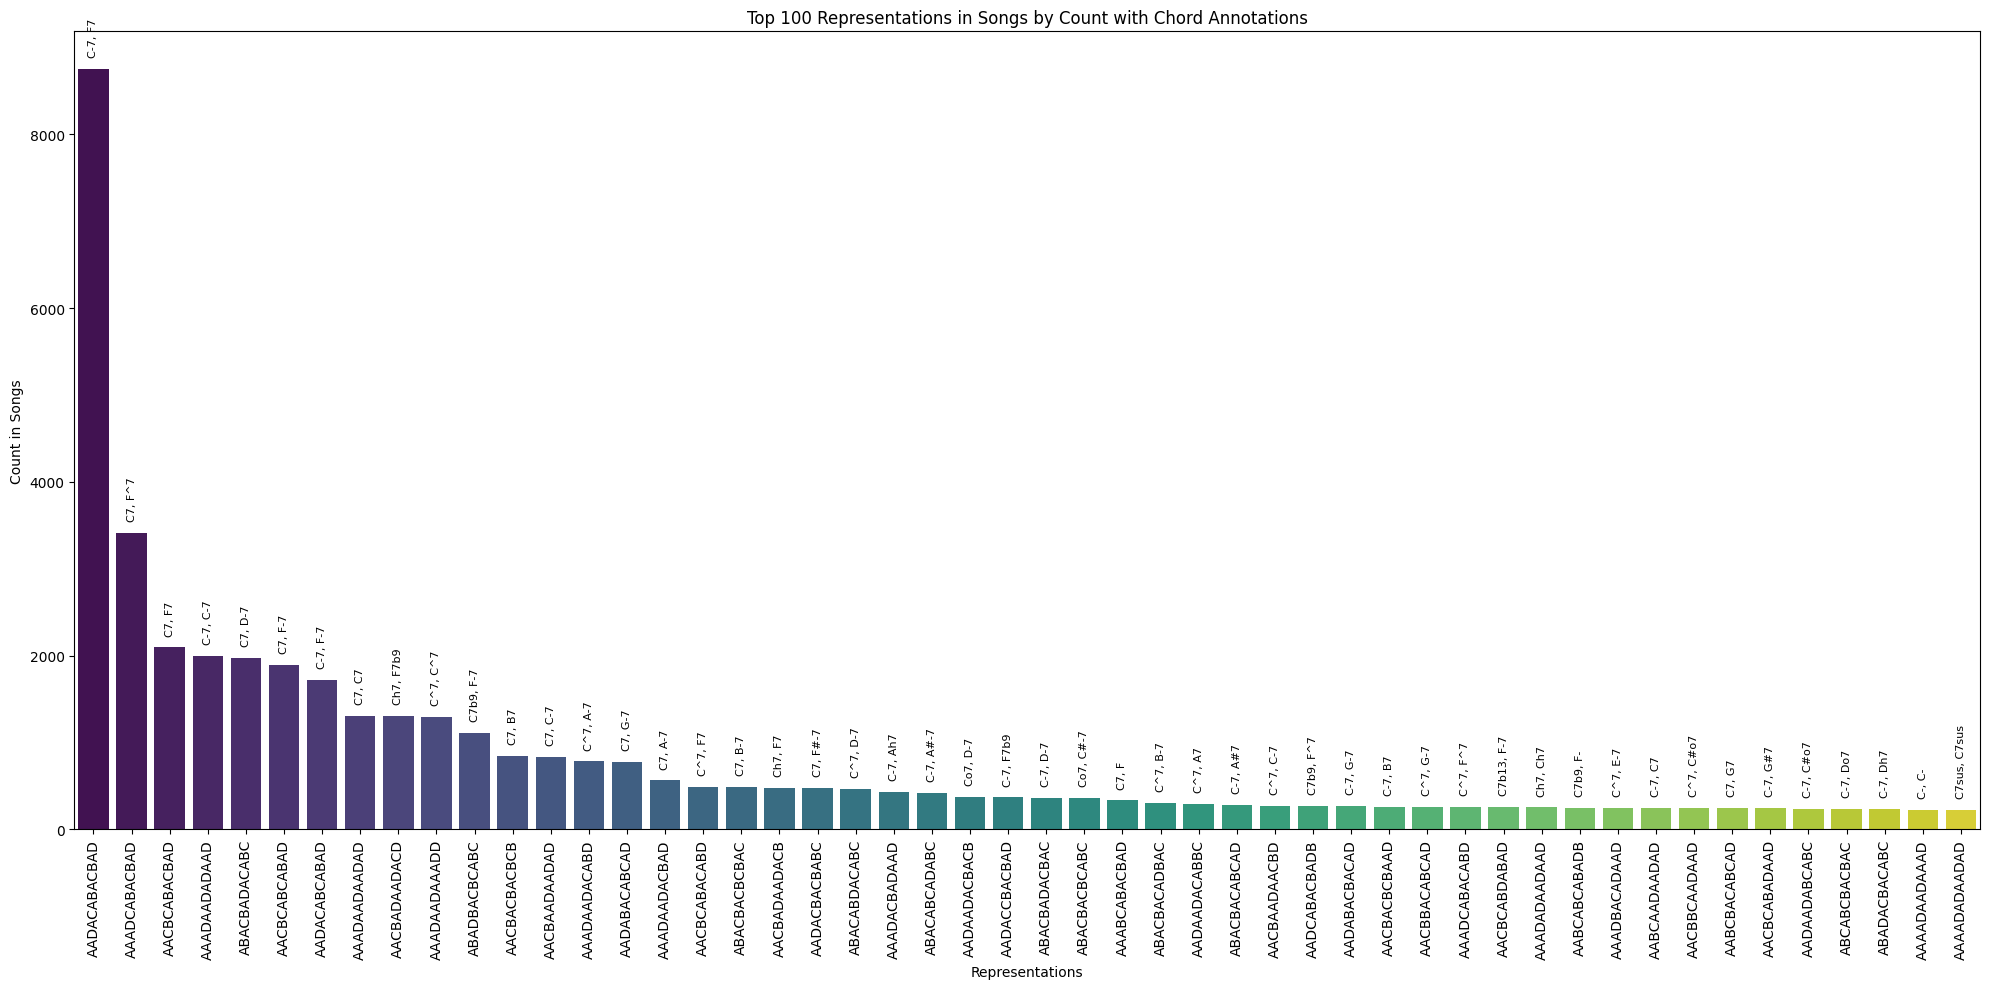

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
top_representations = [rep for rep, info in sorted_comparison[:50]]
top_counts = [info['in_songs'] for rep, info in sorted_comparison[:50]]

# Handling the actual structure of grouped_results
chord_annotations = []
for rep in top_representations:
    if rep in grouped_results and grouped_results[rep]:
        # Assuming each item in grouped_results[rep] is a tuple
        chords_info = grouped_results[rep][0][:2]  # Selecting the first item in the group
        # Create a string representation of the chords (adjust according to the actual data structure)
        chord_str = ', '.join(str(chord) for chord in chords_info)
        chord_annotations.append(chord_str)
    else:
        chord_annotations.append("")

# Create the plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
barplot = sns.barplot(x=top_representations, y=top_counts, palette="viridis")

# Annotate with chords
for idx, (label, count) in enumerate(zip(top_representations, top_counts)):
    if chord_annotations[idx]:
        barplot.annotate(chord_annotations[idx], (idx, count), textcoords="offset points",
                         xytext=(0, 10), ha='center', fontsize=8, rotation=90)

plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.xlabel('Representations')
plt.ylabel('Count in Songs')
plt.title('Top 100 Representations in Songs by Count with Chord Annotations')
plt.tight_layout()
plt.show()


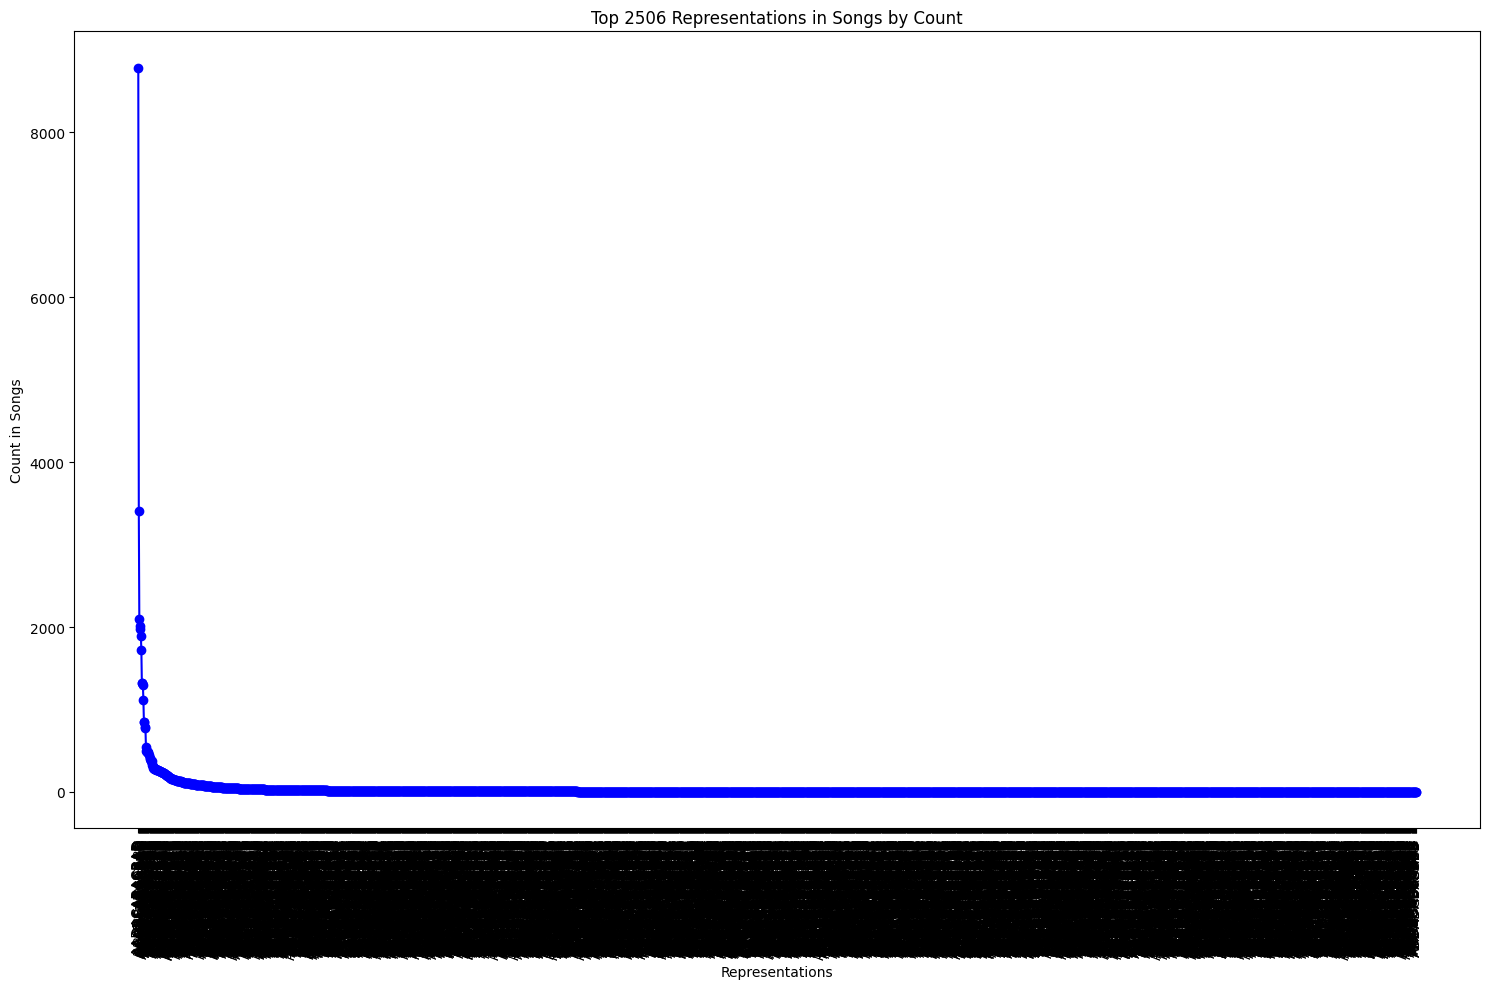

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
top_representations = [rep for rep, info in sorted_comparison[:2506]]
top_counts = [info['in_songs'] for rep, info in sorted_comparison[:2506]]

# Create the plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.plot(top_representations, top_counts, marker='o', linestyle='-', color='b')

plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.xlabel('Representations')
plt.ylabel('Count in Songs')
plt.title('Top 2506 Representations in Songs by Count')
plt.tight_layout()
plt.show()
